In [1]:
import numpy as np
import pandas as pd

Result_2 = {
    "names": ["Alice", "Bob", "Charlie", "Diana", "Ethan", "Fiona", "George", "Hannah", "Ian", "Julia"],
    "ages": [23, 25, 22, 24, 21, 23, 26, 22, 24, 25],
    "grades": [88, 92, 45, 90, 78, 49, 95, 87, 80, 33],
}

df = pd.DataFrame(Result_2)
df

,names,ages,grades
0,Alice,23,88
1,Bob,25,92
2,Charlie,22,45
3,Diana,24,90
4,Ethan,21,78
5,Fiona,23,49
6,George,26,95
7,Hannah,22,87
8,Ian,24,80
9,Julia,25,33


In [2]:
# Filtering
try:
    filtered = df[df['grades'] > 90 ]
    print(filtered)
except ValueError:
    print("Error while finding")
finally:
    print("No Result")

    names  ages  grades
1     Bob    25      92
6  George    26      95
No Result


## Handling Missing Values

In [4]:
data = {
    "temperature": [22.5, 21.0, None, 23.1, 20.8, None, 22.3],
    "humidity": [45, None, 50, 55, None, 52, 47],
    "wind_speed": [5.2, None, 4.8, 5.0, 5.5, 4.9, None],
    "rainfall": [0.0, 1.2, None, 0.5, None, 0.0, 0.8],
    "air_quality": [30, 35, 32, None, 34, None, 31]
}

df_missing = pd.DataFrame(data)
df_missing

,temperature,humidity,wind_speed,rainfall,air_quality
0,22.5,45.0,5.2,0.0,30.0
1,21.0,NaN,NaN,1.2,35.0
2,NaN,50.0,4.8,NaN,32.0
3,23.1,55.0,5.0,0.5,NaN
4,20.8,NaN,5.5,NaN,34.0
5,NaN,52.0,4.9,0.0,NaN
6,22.3,47.0,NaN,0.8,31.0


In [5]:
# Find missing values
df_missing.isnull()

,temperature,humidity,wind_speed,rainfall,air_quality
0,False,False,False,False,False
1,False,True,True,False,False
2,True,False,False,True,False
3,False,False,False,False,True
4,False,True,False,True,False
5,True,False,False,False,True
6,False,False,True,False,False


In [6]:
# will drop the whole row if it contains null/ NaN
df_missing.dropna()

,temperature,humidity,wind_speed,rainfall,air_quality
0,22.5,45.0,5.2,0.0,30.0


In [7]:
# fill missing values 
df_missing.fillna(value=0)

,temperature,humidity,wind_speed,rainfall,air_quality
0,22.5,45.0,5.2,0.0,30.0
1,21.0,0.0,0.0,1.2,35.0
2,0.0,50.0,4.8,0.0,32.0
3,23.1,55.0,5.0,0.5,0.0
4,20.8,0.0,5.5,0.0,34.0
5,0.0,52.0,4.9,0.0,0.0
6,22.3,47.0,0.0,0.8,31.0


In [8]:
df_missing.fillna(df_missing.mean(numeric_only=True))

,temperature,humidity,wind_speed,rainfall,air_quality
0,22.50,45.0,5.20,0.0,30.0
1,21.00,49.8,5.08,1.2,35.0
2,21.94,50.0,4.80,0.5,32.0
3,23.10,55.0,5.00,0.5,32.4
4,20.80,49.8,5.50,0.5,34.0
5,21.94,52.0,4.90,0.0,32.4
6,22.30,47.0,5.08,0.8,31.0


## Visualization


In [9]:
data = {
    'Date': [
        '25-06-01', '25-06-02', '25-06-03', '25-06-04', '25-06-05',
        '25-06-06', '25-06-07'
    ],
    'Product': [
        'Apples', 'Bananas', 'Apples', 'Oranges', 'Bananas', 'Apples', 'Oranges'
    ],
    'Units_Sold': [
        30, 45, 25, 20, 50, 35, 40
    ],
    'Unit_Price': [
        1.2, 0.8, 1.2, 1.5, 0.8, 1.2, 1.5
    ]
}

df_sale = pd.DataFrame(data)
df_sale.set_index('Date', inplace=True)

,Date,Product,Units_Sold,Unit_Price
0,2025-06-01,Apples,30,1.2
1,2025-06-02,Bananas,45,0.8
2,2025-06-03,Apples,25,1.2
3,2025-06-04,Oranges,20,1.5
4,2025-06-05,Bananas,50,0.8
5,2025-06-06,Apples,35,1.2
6,2025-06-07,Oranges,40,1.5


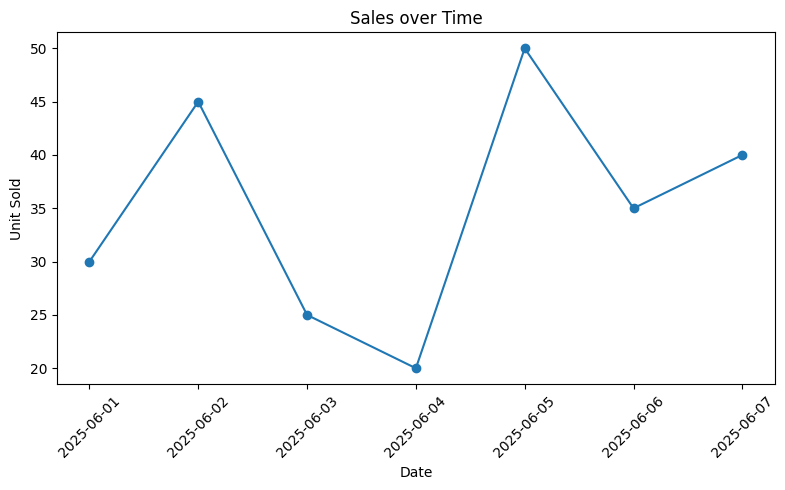

In [21]:
sale_by_day = df_sale.groupby('Date')['Units_Sold'].sum()
sale_by_day.plot(kind='line', title='Sales over Time' ,marker='o')

plt.ylabel("Unit Sold")
plt.xlabel("Date")

plt.xticks(rotation=45)

# ✅ Optional: increase figure size
plt.gcf().set_size_inches(8, 5)

# ✅ Improve layout to avoid clipping
plt.tight_layout()

plt.show()

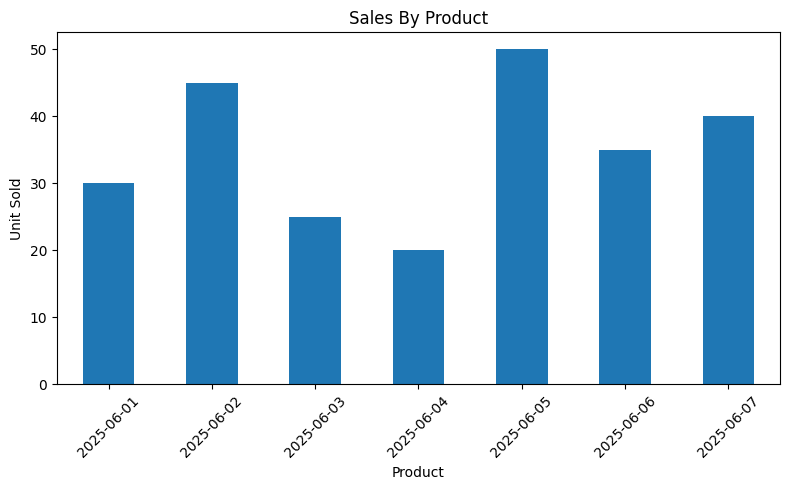

In [25]:
sale_of_product = df_sale.groupby('Product')['Units_Sold'].sum()
sale_by_day.plot(kind='bar', title="Sales By Product")

plt.ylabel('Unit Sold')
plt.xlabel("Product")

plt.xticks(rotation=45)

plt.gcf().set_size_inches(8,5)

plt.tight_layout()

plt.show()